<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 175.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 193.0 MB/s eta 0:00:00


In [2]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 127.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 164.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 180.3 MB/s eta 0:00:00


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-11-20 06:48:37--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  63.2MB/s    in 2.4s    

2025-11-20 06:48:40 (63.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



<Figure size 1000x700 with 0 Axes>

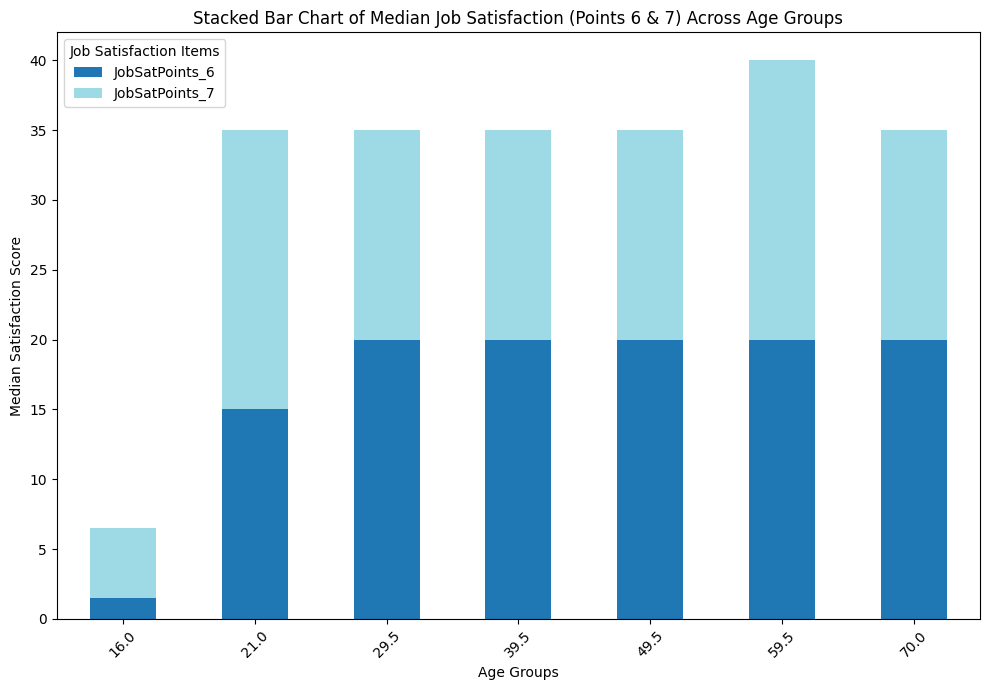

In [7]:
age_mapping = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}

df["AgeGroup"] = df["Age"].map(age_mapping)

age_satisfaction = df.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()

plt.figure(figsize=(10, 7))

age_satisfaction.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 7),
    colormap='tab20'
)

plt.title('Stacked Bar Chart of Median Job Satisfaction (Points 6 & 7) Across Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Median Satisfaction Score')
plt.legend(title='Job Satisfaction Items')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


<Figure size 1200x700 with 0 Axes>

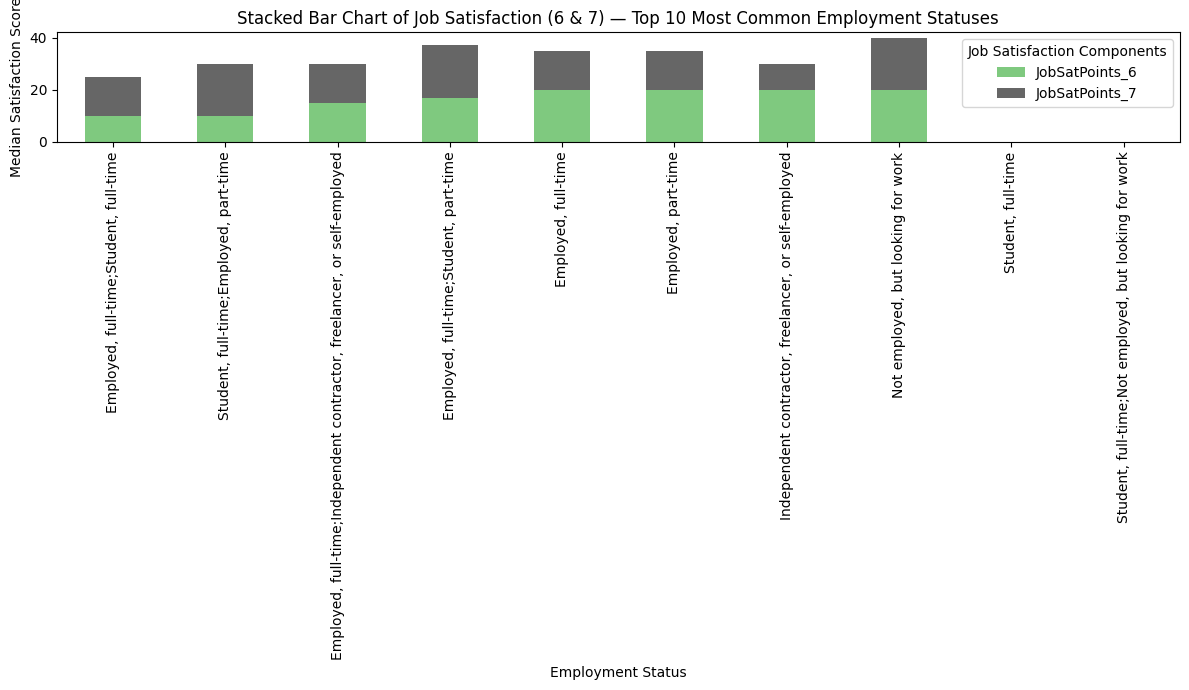

In [8]:

top_10_statuses = df['Employment'].value_counts().head(10).index

df_top10 = df[df['Employment'].isin(top_10_statuses)]
employment_satisfaction_top10 = df_top10.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()
employment_satisfaction_top10 = employment_satisfaction_top10.sort_values(by='JobSatPoints_6')

plt.figure(figsize=(12, 7))

employment_satisfaction_top10.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='Accent'
)

plt.title('Stacked Bar Chart of Job Satisfaction (6 & 7) — Top 10 Most Common Employment Statuses')
plt.xlabel('Employment Status')
plt.ylabel('Median Satisfaction Score')
plt.legend(title='Job Satisfaction Components')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


/tmp/ipykernel_301/554497495.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('AgeGroups2')[['ConvertedCompYearly_normalized', 'JobSatPoints_6_normalized']].median()


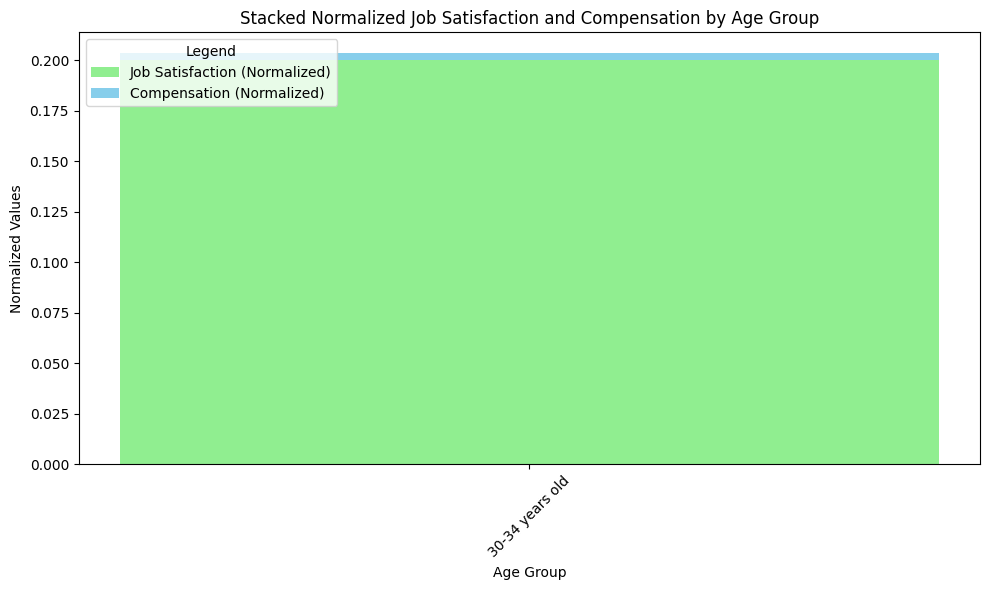

In [13]:
import numpy as np

def extract_age_midpoint(age_str):
    if 'years old' in str(age_str):
        age_range = age_str.split(' ')[0]
        try:
            start_age, end_age = map(int, age_range.split('-'))
            return (start_age + end_age) / 2
        except ValueError:
            return np.nan
    return np.nan

# Apply the function to create numerical age values
df['AgeMid'] = df['Age'].apply(extract_age_midpoint)

# Drop rows where AgeMid is NaN
df = df.dropna(subset=['AgeMid'])

# Define age group 30-35
bins = [29.5, 35]  
labels = ['30-34 years old']
df['AgeGroups2'] = pd.cut(df['AgeMid'], bins=bins, labels=labels, right=False)

# Normalize JobSatPoints_6 and ConvertedCompYearly
df['JobSatPoints_6_normalized'] = (df['JobSatPoints_6'] - df['JobSatPoints_6'].min()) / (df['JobSatPoints_6'].max() - df['JobSatPoints_6'].min())
df['ConvertedCompYearly_normalized'] = (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].min()) / (df['ConvertedCompYearly'].max() - df['ConvertedCompYearly'].min())

# Group by 'AgeGroups2' and calculate the median
grouped = df.groupby('AgeGroups2')[['ConvertedCompYearly_normalized', 'JobSatPoints_6_normalized']].median()

# Create Stacked Bar Chart
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(grouped.index, grouped['JobSatPoints_6_normalized'], color='lightgreen', label='Job Satisfaction (Normalized)', width=0.6)
ax.bar(grouped.index, grouped['ConvertedCompYearly_normalized'], color='skyblue', label='Compensation (Normalized)', width=0.6, bottom=grouped['JobSatPoints_6_normalized'])

# Labels and Formatting
ax.set_xlabel('Age Group')
ax.set_ylabel('Normalized Values')
ax.set_title('Stacked Normalized Job Satisfaction and Compensation by Age Group')
plt.xticks(rotation=45)
ax.legend(loc='upper left', title="Legend")

plt.tight_layout()
plt.show()



##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


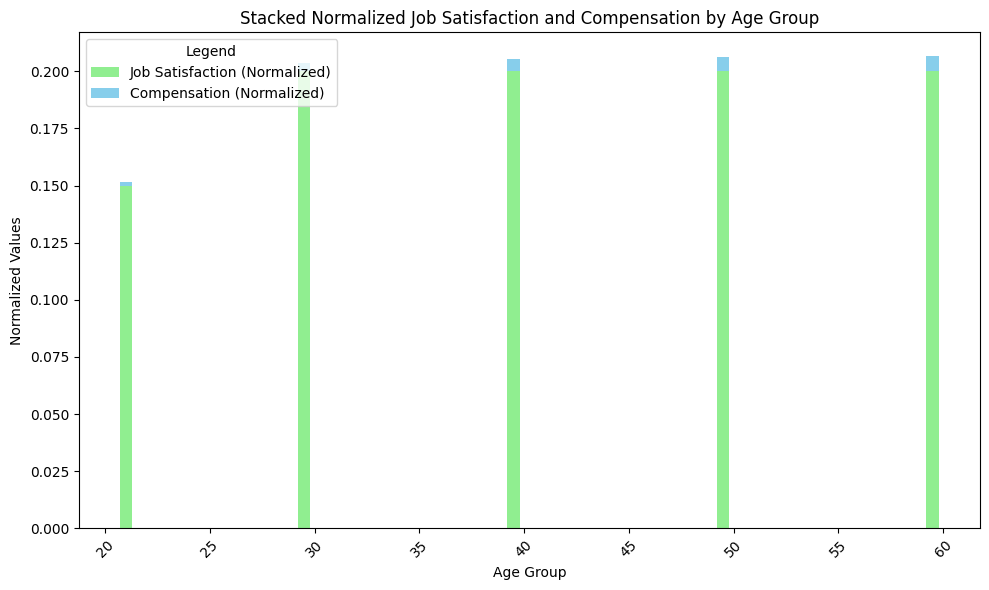

In [20]:

age_mapping = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}

df["AgeGroup"] = df["Age"].map(age_mapping)
df = df.dropna(subset=['AgeGroup'])


df['JobSatPoints_6_normalized'] = (df['JobSatPoints_6'] - df['JobSatPoints_6'].min()) / (df['JobSatPoints_6'].max() - df['JobSatPoints_6'].min())
df['ConvertedCompYearly_normalized'] = (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].min()) / (df['ConvertedCompYearly'].max() - df['ConvertedCompYearly'].min())

# Group by 'AgeGroups2' and calculate the median
grouped = df.groupby('AgeGroup')[['ConvertedCompYearly_normalized', 'JobSatPoints_6_normalized']].median()

# Create Stacked Bar Chart
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(grouped.index, grouped['JobSatPoints_6_normalized'], color='lightgreen', label='Job Satisfaction (Normalized)', width=0.6)
ax.bar(grouped.index, grouped['ConvertedCompYearly_normalized'], color='skyblue', label='Compensation (Normalized)', width=0.6, bottom=grouped['JobSatPoints_6_normalized'])

# Labels and Formatting
ax.set_xlabel('Age Group')
ax.set_ylabel('Normalized Values')
ax.set_title('Stacked Normalized Job Satisfaction and Compensation by Age Group')
plt.xticks(rotation=45)
ax.legend(loc='upper left', title="Legend")

plt.tight_layout()
plt.show()



### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


<Figure size 1200x700 with 0 Axes>

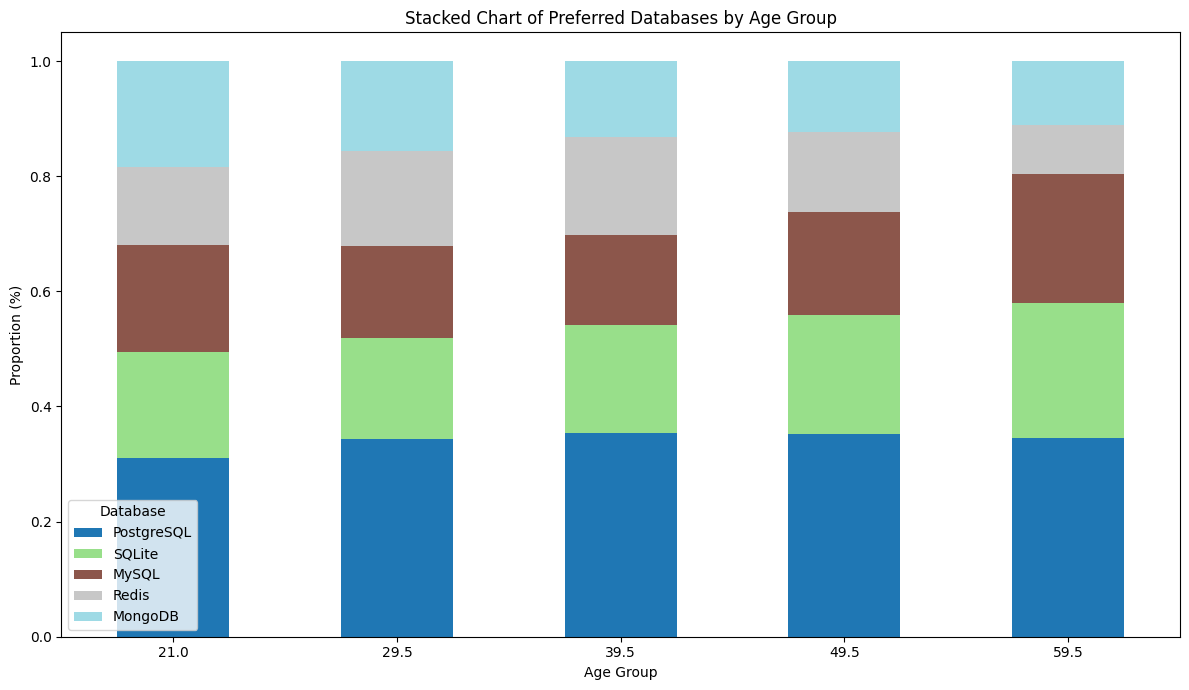

In [22]:

age_mapping = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}

df["AgeGroup"] = df["Age"].map(age_mapping)

#Explode the databases respondents want to work with
db_col = "DatabaseWantToWorkWith"   
df_db = df[["AgeGroup", db_col]].dropna()

df_db_exploded = df_db.assign(
    Database=df_db[db_col].str.split(";")
).explode("Database")

df_db_exploded["Database"] = df_db_exploded["Database"].str.strip()

# Count occurrences per age group
db_counts = pd.crosstab(df_db_exploded["AgeGroup"], df_db_exploded["Database"])

# Select top 5 databases globally
top_5_dbs = db_counts.sum().sort_values(ascending=False).head(5).index

db_counts_top5 = db_counts[top_5_dbs]

#  Convert to proportions
db_props = db_counts_top5.div(db_counts_top5.sum(axis=1), axis=0)

# Plot stacked bar chart
plt.figure(figsize=(12, 7))
db_props.plot(kind='bar', stacked=True, figsize=(12, 7), colormap="tab20")

plt.title("Stacked Chart of Preferred Databases by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion (%)")
plt.legend(title="Database")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


<Figure size 1200x800 with 0 Axes>

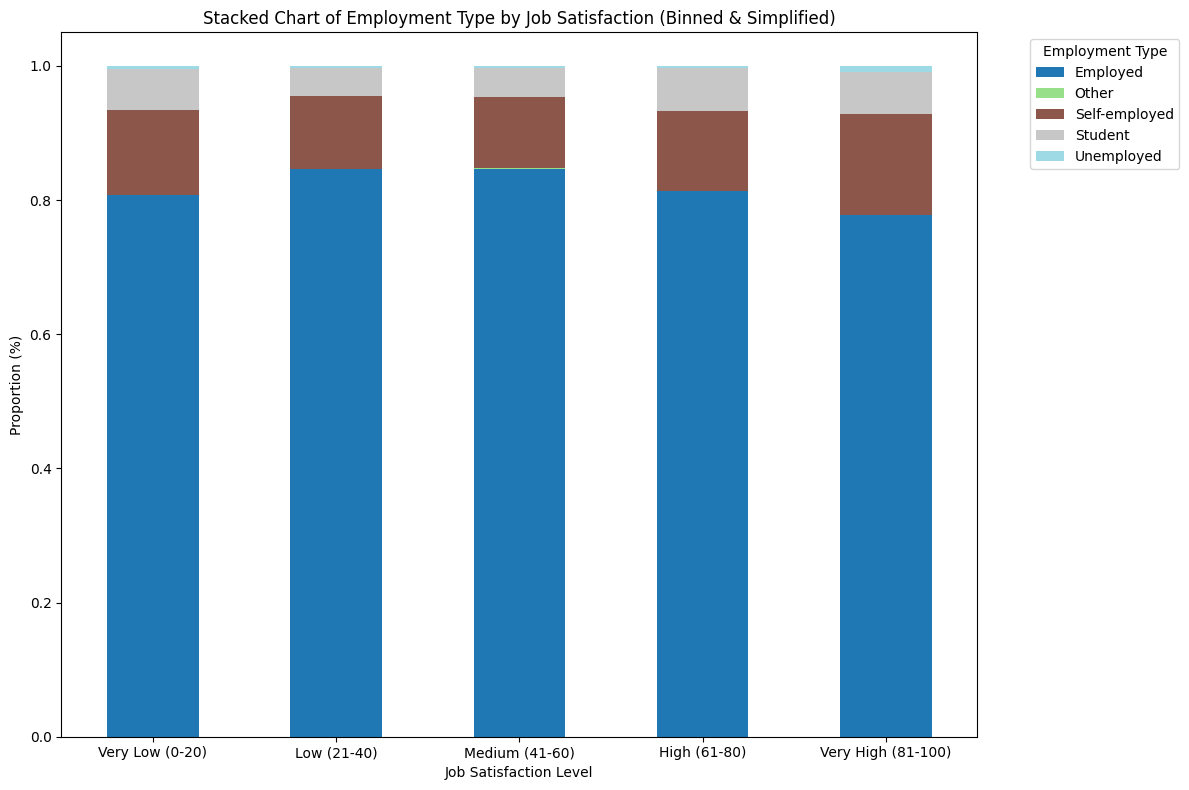

In [30]:

df_filtered = df.dropna(subset=["JobSatPoints_6", "Employment"])

# Split multiple employment types
df_exploded = df_filtered.assign(
    Employment=df_filtered["Employment"].str.split(";")
).explode("Employment")
df_exploded["Employment"] = df_exploded["Employment"].str.strip()

# Map to simplified categories
employment_mapping = {
    "Employed, full-time": "Employed",
    "Employed, part-time": "Employed",
    "Independent contractor, freelancer, or self-employed": "Self-employed",
    "Not employed, and not looking for work": "Unemployed",
    "Not employed, but looking for work": "Unemployed",
    "Student, full-time": "Student",
    "Student, part-time": "Student",
    "Retired": "Other",
    "I prefer not to say": "Other"
}
df_exploded["EmploymentSimplified"] = df_exploded["Employment"].map(
    lambda x: employment_mapping.get(x, "Other")
)

# Bin JobSatPoints_6 into 5 categories
bins = [0, 20, 40, 60, 80, 100]
labels = ["Very Low (0-20)", "Low (21-40)", "Medium (41-60)", "High (61-80)", "Very High (81-100)"]
df_exploded["JobSatBinned"] = pd.cut(df_exploded["JobSatPoints_6"], bins=bins, labels=labels, include_lowest=True)

# Crosstab: Job Satisfaction Bins × EmploymentSimplified
emp_sat_table = pd.crosstab(
    df_exploded["JobSatBinned"],
    df_exploded["EmploymentSimplified"]
)

# Convert to proportions
emp_sat_props = emp_sat_table.div(emp_sat_table.sum(axis=1), axis=0)

# Plot
plt.figure(figsize=(12, 8))
emp_sat_props.plot(
    kind="bar",
    stacked=True,
    colormap="tab20",
    figsize=(12, 8)
)

plt.title("Stacked Chart of Employment Type by Job Satisfaction (Binned & Simplified)")
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Proportion (%)")
plt.xticks(rotation=0)
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


<Figure size 1200x800 with 0 Axes>

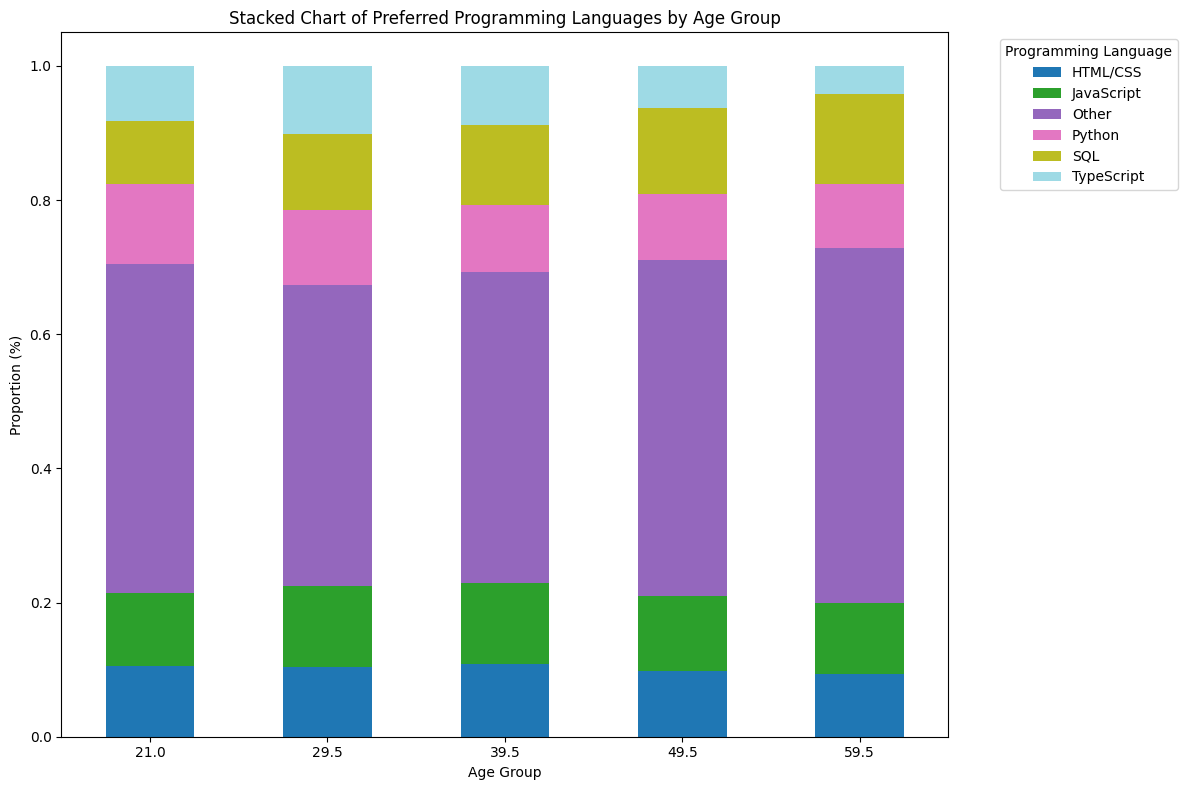

In [32]:


df_filtered = df.dropna(subset=["LanguageAdmired", "AgeGroup"])

# Split multiple languages and explode
df_exploded = df_filtered.assign(
    Language=df_filtered["LanguageAdmired"].str.split(";")
).explode("Language")
df_exploded["Language"] = df_exploded["Language"].str.strip()

# Optional: choose top 5 most admired languages
top_languages = df_exploded["Language"].value_counts().head(5).index
df_exploded["LanguageSimplified"] = df_exploded["Language"].apply(
    lambda x: x if x in top_languages else "Other"
)

# Crosstab: AgeGroup × LanguageSimplified
lang_age_table = pd.crosstab(
    df_exploded["AgeGroup"],
    df_exploded["LanguageSimplified"]
)

# Convert to proportions (optional, for % stacked)
lang_age_props = lang_age_table.div(lang_age_table.sum(axis=1), axis=0)

# Plot
plt.figure(figsize=(12, 8))
lang_age_props.plot(
    kind="bar",
    stacked=True,
    colormap="tab20",
    figsize=(12, 8)
)

plt.title("Stacked Chart of Preferred Programming Languages by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion (%)")
plt.xticks(rotation=0)
plt.legend(title="Programming Language", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [33]:

df_filtered = df.dropna(subset=["PlatformAdmired", "Employment"])

# -------------------------
# 1. Split multiple platforms
# -------------------------
df_exploded = df_filtered.assign(
    Platform=df_filtered["PlatformAdmired"].str.split(";")
).explode("Platform")
df_exploded["Platform"] = df_exploded["Platform"].str.strip()

# -------------------------
# 2. Simplify Employment
# -------------------------
employment_mapping = {
    "Employed, full-time": "Employed",
    "Employed, part-time": "Employed",
    "Independent contractor, freelancer, or self-employed": "Self-employed",
    "Not employed, and not looking for work": "Unemployed",
    "Not employed, but looking for work": "Unemployed",
    "Student, full-time": "Student",
    "Student, part-time": "Student",
    "Retired": "Other",
    "I prefer not to say": "Other"
}
df_exploded["EmploymentSimplified"] = df_exploded["EmploymentStatus"].map(
    lambda x: employment_mapping.get(x, "Other")
)

# -------------------------
# 3. Select Top 5 Platforms
# -------------------------
top_platforms = df_exploded["Platform"].value_counts().head(5).index
df_exploded["PlatformSimplified"] = df_exploded["Platform"].apply(
    lambda x: x if x in top_platforms else "Other"
)

# -------------------------
# 4. Crosstab: Employment × Platform
# -------------------------
platform_emp_table = pd.crosstab(
    df_exploded["EmploymentSimplified"],
    df_exploded["PlatformSimplified"]
)

# Convert to proportions
platform_emp_props = platform_emp_table.div(platform_emp_table.sum(axis=1), axis=0)

# -------------------------
# 5. Plot Stacked Bar Chart
# -------------------------
plt.figure(figsize=(12, 8))
platform_emp_props.plot(
    kind="bar",
    stacked=True,
    colormap="tab20",
    figsize=(12, 8)
)

plt.title("Stacked Chart of Admired Platforms by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Proportion (%)")
plt.xticks(rotation=0)
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


KeyError: ['EmploymentStatus']

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
